# PHOENIX HEALTH INSURANCE
# Multiple Linear Regression Model

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(dataset.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(dataset.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
# CHECKING TO SEE IF ANY VALUES ARE MISSING

missing_values = dataset.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# print(X)

In [ ]:
# print(y)

# Label Encoding Data

In [ ]:
#ENCODING SEX

from sklearn.preprocessing import LabelEncoder

binary_data = X[:,1]

encoder = LabelEncoder()
binary_encoded = encoder.fit_transform(binary_data)
X[:,1] = binary_encoded
# print(X)

In [ ]:
#ENCODING SMOKE

from sklearn.preprocessing import LabelEncoder

binary_data = X[:,4]

encoder = LabelEncoder()
binary_encoded = encoder.fit_transform(binary_data)
X[:,4] = binary_encoded
# print(X)

In [ ]:
#ENCODING REGION

from sklearn.preprocessing import LabelEncoder

binary_data = X[:,5]

encoder = LabelEncoder()
binary_encoded = encoder.fit_transform(binary_data)
X[:,5] = binary_encoded
for i in range(0,10):
  print(X[i])

[19 0 27.9 0 1 3]
[18 1 33.77 1 0 2]
[28 1 33.0 3 0 2]
[33 1 22.705 0 0 1]
[32 1 28.88 0 0 1]
[31 0 25.74 0 0 2]
[46 0 33.44 1 0 2]
[37 0 27.74 3 0 1]
[37 1 29.83 2 0 0]
[60 0 25.84 0 0 1]


SPLITTING AND TRAINING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_test)

[[ 0.40866695 -1.02223482 -0.87809467  0.74502806 -0.50631373 -1.37562266]
 [-0.23086339 -1.02223482 -0.08669494 -0.90141879 -0.50631373 -0.47048206]
 [ 1.75878655 -1.02223482 -0.59877712 -0.90141879  1.97506002 -0.47048206]
 ...
 [-1.50992406 -1.02223482 -0.69188297 -0.90141879 -0.50631373 -1.37562266]
 [ 0.76396158 -1.02223482 -0.80867364 -0.90141879 -0.50631373  1.33979915]
 [-0.94145265 -1.02223482 -1.35914156 -0.90141879 -0.50631373 -0.47048206]]


In [ ]:
print(X_train)

[[ 0.90607943  0.97824881 -0.52118891 -0.90141879  1.97506002 -0.47048206]
 [-0.65721695  0.97824881  2.23278415  0.74502806 -0.50631373  0.43465855]
 [-1.43886514  0.97824881 -0.53670655  0.74502806 -0.50631373 -0.47048206]
 ...
 [ 1.33243299  0.97824881 -0.87809467 -0.90141879 -0.50631373 -1.37562266]
 [-0.15980446 -1.02223482  2.7848855   0.74502806  1.97506002  1.33979915]
 [ 1.11925621  0.97824881 -0.10629617 -0.90141879 -0.50631373  1.33979915]]


## Training using Multiple Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8983.73  9095.07]
 [ 7138.4   5272.18]
 [37183.19 29330.98]
 [ 9495.53  9301.89]
 [26970.15 33750.29]
 [10627.05  4536.26]
 [  285.21  2117.34]
 [16847.78 14210.54]
 [ 1162.59  3732.63]
 [11229.31 10264.44]
 [28216.14 18259.22]
 [ 9339.4   7256.72]
 [ 5374.21  3947.41]
 [38414.47 46151.12]
 [40328.14 48673.56]
 [37148.84 44202.65]
 [15237.93  9800.89]
 [36108.68 42969.85]
 [ 9300.6   8233.1 ]
 [31717.38 21774.32]
 [ 3826.48  5080.1 ]
 [10059.14  7441.5 ]
 [ 2255.63  1256.3 ]
 [ 6886.37  2755.02]
 [11434.95 11085.59]
 [12909.71 10923.93]
 [14577.63 12644.59]
 [ 6186.35 18804.75]
 [ 9965.39  9715.84]
 [ 2136.82  1131.51]
 [ 9185.3  15828.82]
 [13188.28 11842.62]
 [ 4578.01  2020.55]
 [ 3585.75  5693.43]
 [ 4370.63  2904.09]
 [12742.93  7448.4 ]
 [ 2034.16  2597.78]
 [ 8892.79  7337.75]
 [33590.9  23887.66]
 [32653.1  38709.18]
 [ 3915.47  4687.8 ]
 [ 4217.56  2643.27]
 [14185.52 11674.13]
 [11519.42 12124.99]
 [ 8701.26  4890.  ]
 [12150.81 12333.83]
 [ 5247.36  3579.83]
 [ 3240.74  4

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7970561040137825


# VISUALIZATIONS

## PREDICTED VS. ACTUAL INSURANCE COSTS

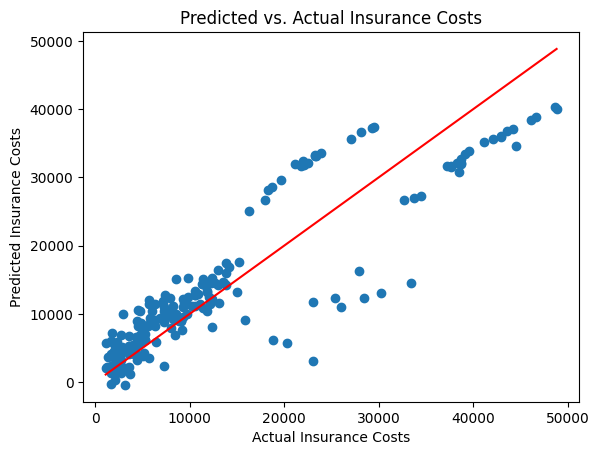

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Insurance Costs')
plt.ylabel('Predicted Insurance Costs')
plt.title('Predicted vs. Actual Insurance Costs')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

## OVERALL DISTRIBUTION OF CHARGES

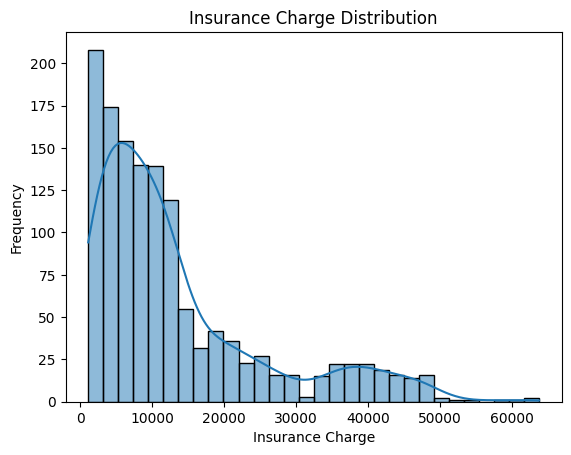

In [ ]:
sns.histplot(y, kde=True)
plt.title('Insurance Charge Distribution')
plt.xlabel('Insurance Charge')
plt.ylabel('Frequency')
plt.show()

## MOST IMPORTANT FEATURES

[3662.83   64.89 1980.99  513.22 9579.96  249.25]


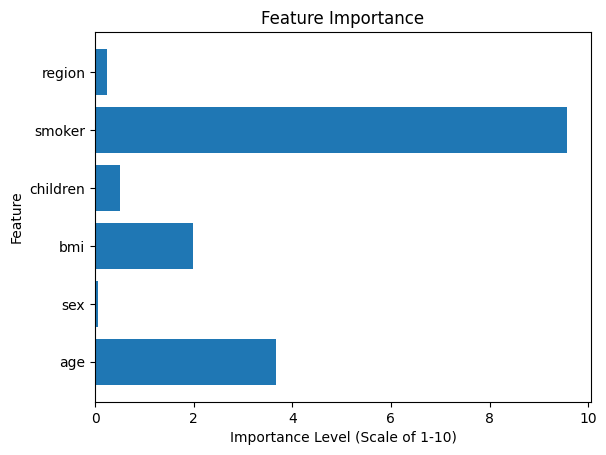

In [ ]:
important_features = ['age','sex','bmi','children','smoker','region']
importance_level = np.abs(regressor.coef_)
print(importance_level)

plt.barh(important_features, importance_level/1000)
plt.title('Feature Importance')
plt.xlabel('Importance Level (Scale of 1-10)')
plt.ylabel('Feature')
plt.show()

In [ ]:
print('LET PHOENIX HEALTH PREDICT YOUR INSURANCE COSTS!')

age_input = int(input("Enter age: ").strip())

sex_input = input("Enter sex (male/female): ").strip().lower()
if sex_input == 'male':
  sex_input = 1
elif sex_input == 'female':
  sex_input = 0
else: "Invalid Sex Entry"

bmi_input = float(input("Enter BMI: ").strip())

children_input = int(input("Enter number of children: ").strip())

smoker_input = input("Are you a smoker (yes/no): ").strip().lower()
if smoker_input == 'yes':
  smoker_input = 1
elif smoker_input == 'no':
  smoker_input = 0
else: "Invalid Smoker Entry"

region_input = input("Enter Region(Pick One: northeast | northwest | southeast | southwest): ").strip().lower()
if region_input == 'southwest':
  region_input = 0
elif region_input == 'southeast':
  region_input = 1
elif region_input == 'northeast':
  region_input = 2
elif region_input == 'northwest':
  region_input = 3
else: "Invalid Region Entry"

inputs = np.array([[age_input, sex_input, bmi_input, children_input, smoker_input, region_input]])
scaled_inputs = sc.transform(inputs)
# print(scaled_inputs)

insurance_estimate = regressor.predict(scaled_inputs)

print("Estimated Insurance Costs: $" , round(insurance_estimate[0],2))

LET PHOENIX HEALTH PREDICT YOUR INSURANCE COSTS!
Enter age: 30
Enter sex (male/female): male
Enter BMI: 35
Enter number of children: 2
Are you a smoker (yes/no): yes
Enter Region(Pick One: northeast | northwest | southeast | southwest): northeast
Estimated Insurance Costs: $ 31449.22
